## 1. Please write code in Colab to read the table and report its size (# of columns and rows) [20pts]


In [1]:
from datascience import *
import numpy as np
np.set_printoptions(threshold=50)

url = 'https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/group_summary_table_20220929.csv'
student = Table.read_table(url)

import matplotlib

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
matplotlib.rc('font', family='Microsoft YaHei')

In [2]:
#column
student.num_columns

8

In [3]:
#row
student.num_rows

49

## 2. Which row looks like an anomaly and should be removed?  Why?  
* Please explain. [10 points]
* Please write code in Colab to remove it and return an updated table. [10 points]


### Ans: I think row 5 should be removed because its column in 離校院別名稱 is 文學院中國文學系 (not a college), which is different from the others. Therefore, the data is a anomaly, it is not useful in data analysis and even will affect the result's accuracy.




In [4]:
fix_student = student.where('離校院別名稱(中)', are.not_equal_to('文學院中國文學系'))
fix_student

性別,入學管道,離校院別名稱(中),num_students,credits_mean,credits_std,gpa_mean,gpa_std
女,學士班(指考分發/聯考),地球科學學院,95,152.642,15.29,78.1504,7.17645
女,學士班(指考分發/聯考),客家學院,17,151.824,16.7639,80.1531,6.12428
女,學士班(指考分發/聯考),工學院,174,151.075,16.5397,78.8585,6.41941
女,學士班(指考分發/聯考),文學院,686,154.219,20.8801,79.4352,5.83358
女,學士班(指考分發/聯考),理學院,191,149.953,13.3548,77.0528,6.97312
女,學士班(指考分發/聯考),生醫理工學院,76,151.961,17.8044,78.398,7.0676
女,學士班(指考分發/聯考),管理學院,756,152.718,14.3223,78.5168,6.68581
女,學士班(指考分發/聯考),資訊電機學院,119,150.126,14.8715,81.3947,6.56094
女,學士班申請入學,地球科學學院,134,155.507,15.7703,79.731,7.3229
女,學士班申請入學,客家學院,31,161.677,32.0639,83.1672,5.32421


## 3. Are there more girls than boys?
* Please use ‘group’ to do it. [10 points]
* What % of students are female? [10 points]


In [5]:
sex_group_fix_student = fix_student.group("性別")
sex_group_fix_student

性別,count
女,24
男,24


### There are 24 girls and 24 boys. Therefore, the number of girls is equal to boys.

In [6]:
Table().with_column("Female Percentage", sex_group_fix_student.where("性別", are.equal_to("女")).column(1)/fix_student.num_rows).set_format("Female Percentage", PercentFormatter)

Female Percentage
50.00%


## 4. Which college has the most graduates?
* Please use ‘group’ to do it. [10 points]
* Please plot a bar chart to show the distribution of # of graduates by college and sort it in descending order. [10 points]


In [7]:
college_group_fix_student = fix_student.select("離校院別名稱(中)", 'num_students').group("離校院別名稱(中)",sum)
college_group_fix_student

離校院別名稱(中),num_students sum
地球科學學院,849
客家學院,88
工學院,2217
文學院,1212
理學院,1653
生醫理工學院,336
管理學院,2542
資訊電機學院,2045


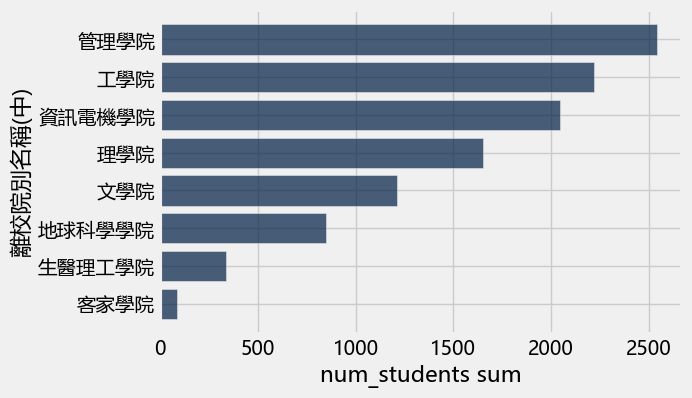

In [8]:
most_graduates = college_group_fix_student.sort('num_students sum', descending = True)
most_graduates.barh('離校院別名稱(中)')

A: 管理學院

## 5. Which college has the most unbalance 入學管道?  In other word, we say it’s balanced if each 管道 has similar number of graduates.
* Please show me a pivot table, where 入學管道 and college in vertical and horizon directions, respectively, and each cell shows total number of students. [10 points]
* Please plot a bar chart to show the distribution of # of graduates by college and 入學管道, i.e., a 2-D bar chart. [10 points]


In [9]:
entry_and_college = fix_student.pivot("離校院別名稱(中)", "入學管道", values = 'num_students', collect = sum)
entry_and_college

入學管道,地球科學學院,客家學院,工學院,文學院,理學院,生醫理工學院,管理學院,資訊電機學院
學士班(指考分發/聯考),376,25,1231,850,928,185,1488,774
學士班申請入學,368,54,635,204,462,64,659,874
繁星推薦,105,9,351,158,263,87,395,397


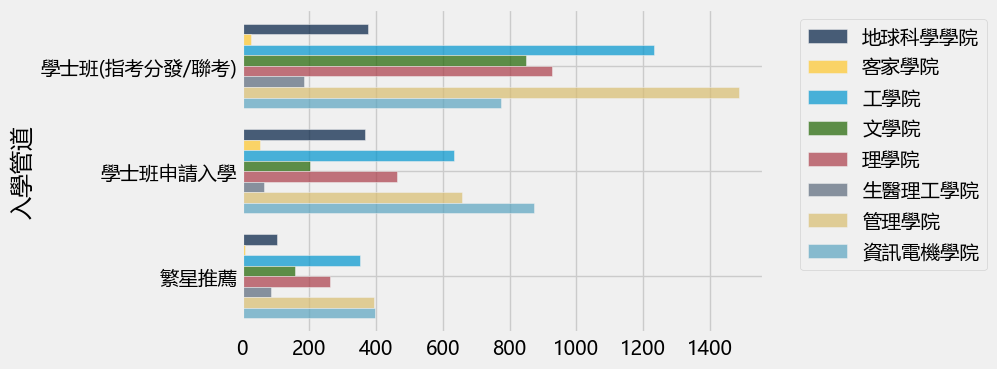

In [10]:
entry_and_college.barh("入學管道")